In [ ]:
#| include: false
from treets import *

## Install

`pip install treets`

## Example for a quick data analysis on phased studies.

In [ ]:
import treets.core as treets
import pandas as pd

Take a brief look on the food logging dataset and the reference information sheet

In [ ]:
treets.file_loader('data/col_test_data/yrt*').head(2)

,original_logtime,desc_text,food_type,PID
0,2021-05-12 02:30:00 +0000,Milk,b,yrt1999
1,2021-05-12 02:45:00 +0000,Some Medication,m,yrt1999


Call summarize_data_with_experiment_phases() function to make the table that contains analytic information that we want.

In [ ]:
df = treets.summarize_data_with_experiment_phases(treets.file_loader('data/col_test_data/yrt*')\
                      , pd.read_excel('data/col_test_data/toy_data_17May2021.xlsx'))

Participant yrt1999 didn't log any food items in the following day(s):
2021-05-12
2021-05-13
2021-05-14
2021-05-15
2021-05-16
2021-05-17
2021-05-18
Participant yrt2000 didn't log any food items in the following day(s):
2021-05-12
2021-05-13
2021-05-14
2021-05-15
2021-05-16
2021-05-17
2021-05-18
Participant yrt1999 have bad logging day(s) in the following day(s):
2021-05-12
2021-05-15
Participant yrt1999 have bad window day(s) in the following day(s):
2021-05-15
2021-05-17
Participant yrt1999 have non adherent day(s) in the following day(s):
2021-05-12
2021-05-15
2021-05-17


In [ ]:
df

,mCC_ID,Participant_Study_ID,Study Phase,Intervention group (TRE or HABIT),Start_Day,End_day,Eating_Window_Start,Eating_Window_End,phase_duration,caloric_entries_num,...,logging_day_counts,%_logging_day_counts,good_logging_days,%_good_logging_days,good_window_days,%_good_window_days,outside_window_days,%_outside_window_days,adherent_days,%_adherent_days
0,yrt1999,2,S-REM,TRE,2021-05-12,2021-05-14,00:00:00,23:59:00,3 days 00:00:00,7,...,3,100.0%,2.0,66.67%,3.0,100.0%,0.0,0.0%,2.0,66.67%
1,yrt1999,2,T3-INT,TRE,2021-05-15,2021-05-18,08:00:00,18:00:00,4 days 00:00:00,8,...,3,75.0%,2.0,50.0%,1.0,25.0%,2.0,50.0%,1.0,25.0%
2,yrt2000,3,T3-INT,TRE,2021-05-12,2021-05-14,08:00:00,16:00:00,3 days 00:00:00,0,...,0,0.0%,0.0,0.0%,0.0,0.0%,0.0,0.0%,0.0,0.0%
3,yrt2000,3,T3-INT,TRE,2021-05-15,2021-05-18,08:00:00,16:00:00,4 days 00:00:00,0,...,0,0.0%,0.0,0.0%,0.0,0.0%,0.0,0.0%,0.0,0.0%
4,yrt2001,4,T12-A,TRE,NaT,NaT,NaN,NaN,NaT,0,...,0,nan%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at resulting statistical information for the first row in the resulting dataset.

In [ ]:
df.iloc[0]

mCC_ID                                       yrt1999
Participant_Study_ID                               2
Study Phase                                    S-REM
Intervention group (TRE or HABIT)                TRE
Start_Day                                 2021-05-12
End_day                                   2021-05-14
Eating_Window_Start                         00:00:00
Eating_Window_End                           23:59:00
phase_duration                       3 days 00:00:00
caloric_entries_num                                7
medication_num                                     0
water_num                                          0
first_cal_avg                               5.916667
first_cal_std                               2.240722
last_cal_avg                               19.666667
last_cal_std                               12.933323
mean_daily_eating_window                       13.75
std_daily_eating_window                    11.986972
earliest_entry                                

## Example for a quick data analysis on non-phased studies.

take a look at the original dataset

In [ ]:
df = treets.file_loader('data/test_food_details.csv')
df.head(2)

,ID,unique_code,research_info_id,desc_text,food_type,original_logtime,foodimage_file_name
0,7572733,alqt14018795225,150,Water,w,2017-12-08 17:30:00+00:00,NaN
1,411111,alqt14018795225,150,Coffee White,b,2017-12-09 00:01:00+00:00,NaN


preprocess the data to create features we might need in the furthur analysis such as float time, week count since the first week, etc.

In [ ]:
df = treets.load_food_data(df,'unique_code', 'original_logtime',4)
df.head(2)

,ID,unique_code,research_info_id,desc_text,food_type,original_logtime,date,float_time,time,week_from_start,year
0,7572733,alqt14018795225,150,Water,w,2017-12-08 17:30:00+00:00,2017-12-08,17.500000,17:30:00,1,2017
1,411111,alqt14018795225,150,Coffee White,b,2017-12-09 00:01:00+00:00,2017-12-08,24.016667,00:01:00,1,2017


Call summarize_data() function to make the table that contains analytic information that we want.¶

In [ ]:
df = treets.summarize_data(df, 'unique_code', 'float_time', 'date')
df.head(2)

,unique_code,num_days,num_total_items,num_f_n_b,num_medications,num_water,first_cal_avg,first_cal_std,last_cal_avg,last_cal_std,eating_win_avg,eating_win_std,good_logging_count,first_cal variation (90%-10%),last_cal variation (90%-10%),2.5%,95%,duration mid 95%
0,alqt1148284857,13,149,96,19,34,7.821795,6.710717,23.485897,4.869082,15.664103,8.231201,146,2.966667,9.666667,4.535000,26.813333,22.636667
1,alqt14018795225,64,488,484,3,1,7.525781,5.434563,25.858594,3.374839,18.332813,6.603913,484,13.450000,3.100000,4.183333,27.438333,23.416667


Look at resulting statistical information for the first row in the resulting dataset.

In [ ]:
df.iloc[0]

unique_code                      alqt1148284857
num_days                                     13
num_total_items                             149
num_f_n_b                                    96
num_medications                              19
num_water                                    34
first_cal_avg                          7.821795
first_cal_std                          6.710717
last_cal_avg                          23.485897
last_cal_std                           4.869082
eating_win_avg                        15.664103
eating_win_std                         8.231201
good_logging_count                          146
first_cal variation (90%-10%)          2.966667
last_cal variation (90%-10%)           9.666667
2.5%                                      4.535
95%                                   26.813333
duration mid 95%                      22.636667
Name: 0, dtype: object

## Clean text in food loggings

In [ ]:
# import the dataset
df = treets.file_loader('data/col_test_data/yrt*')
df.head(3)

,original_logtime,desc_text,food_type,PID
0,2021-05-12 02:30:00 +0000,Milk,b,yrt1999
1,2021-05-12 02:45:00 +0000,Some Medication,m,yrt1999
2,2021-05-12 04:45:00 +0000,bacon egg,f,yrt1999


In [ ]:
treets.clean_loggings(df, 'desc_text', 'PID').head(3)

,PID,desc_text,cleaned
0,yrt1999,Milk,[milk]
1,yrt1999,Some Medication,[medication]
2,yrt1999,bacon egg,"[bacon, egg]"


We can see that words are lower cased, modifiers are removed(2nd row) and items are split into individual items(third row).

## Visualizations

In [ ]:
# import the dataset
df = treets.file_loader('data/test_food_details.csv')
df.head(2)

,ID,unique_code,research_info_id,desc_text,food_type,original_logtime,foodimage_file_name
0,7572733,alqt14018795225,150,Water,w,2017-12-08 17:30:00+00:00,NaN
1,411111,alqt14018795225,150,Coffee White,b,2017-12-09 00:01:00+00:00,NaN


make a scatter plot for people's breakfast time

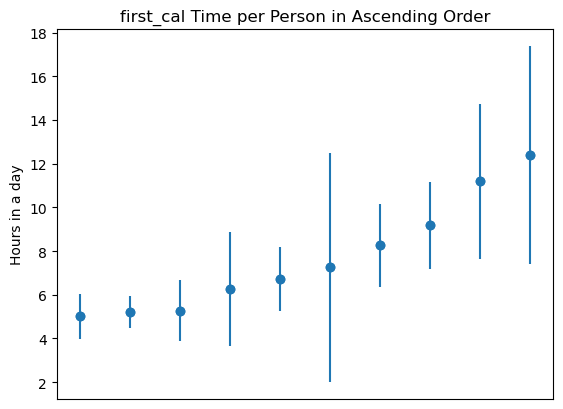

In [ ]:
# create required features for function first_cal_mean_with_error_bar()
df['original_logtime'] = pd.to_datetime(df['original_logtime'])
df['local_time'] = treets.find_float_time(df, 'original_logtime')
df['date'] = treets.find_date(df, 'original_logtime')

# call the function
treets.first_cal_mean_with_error_bar(df,'unique_code', 'date', 'local_time')

Use swarmplot to visualize each person's eating time distribution.

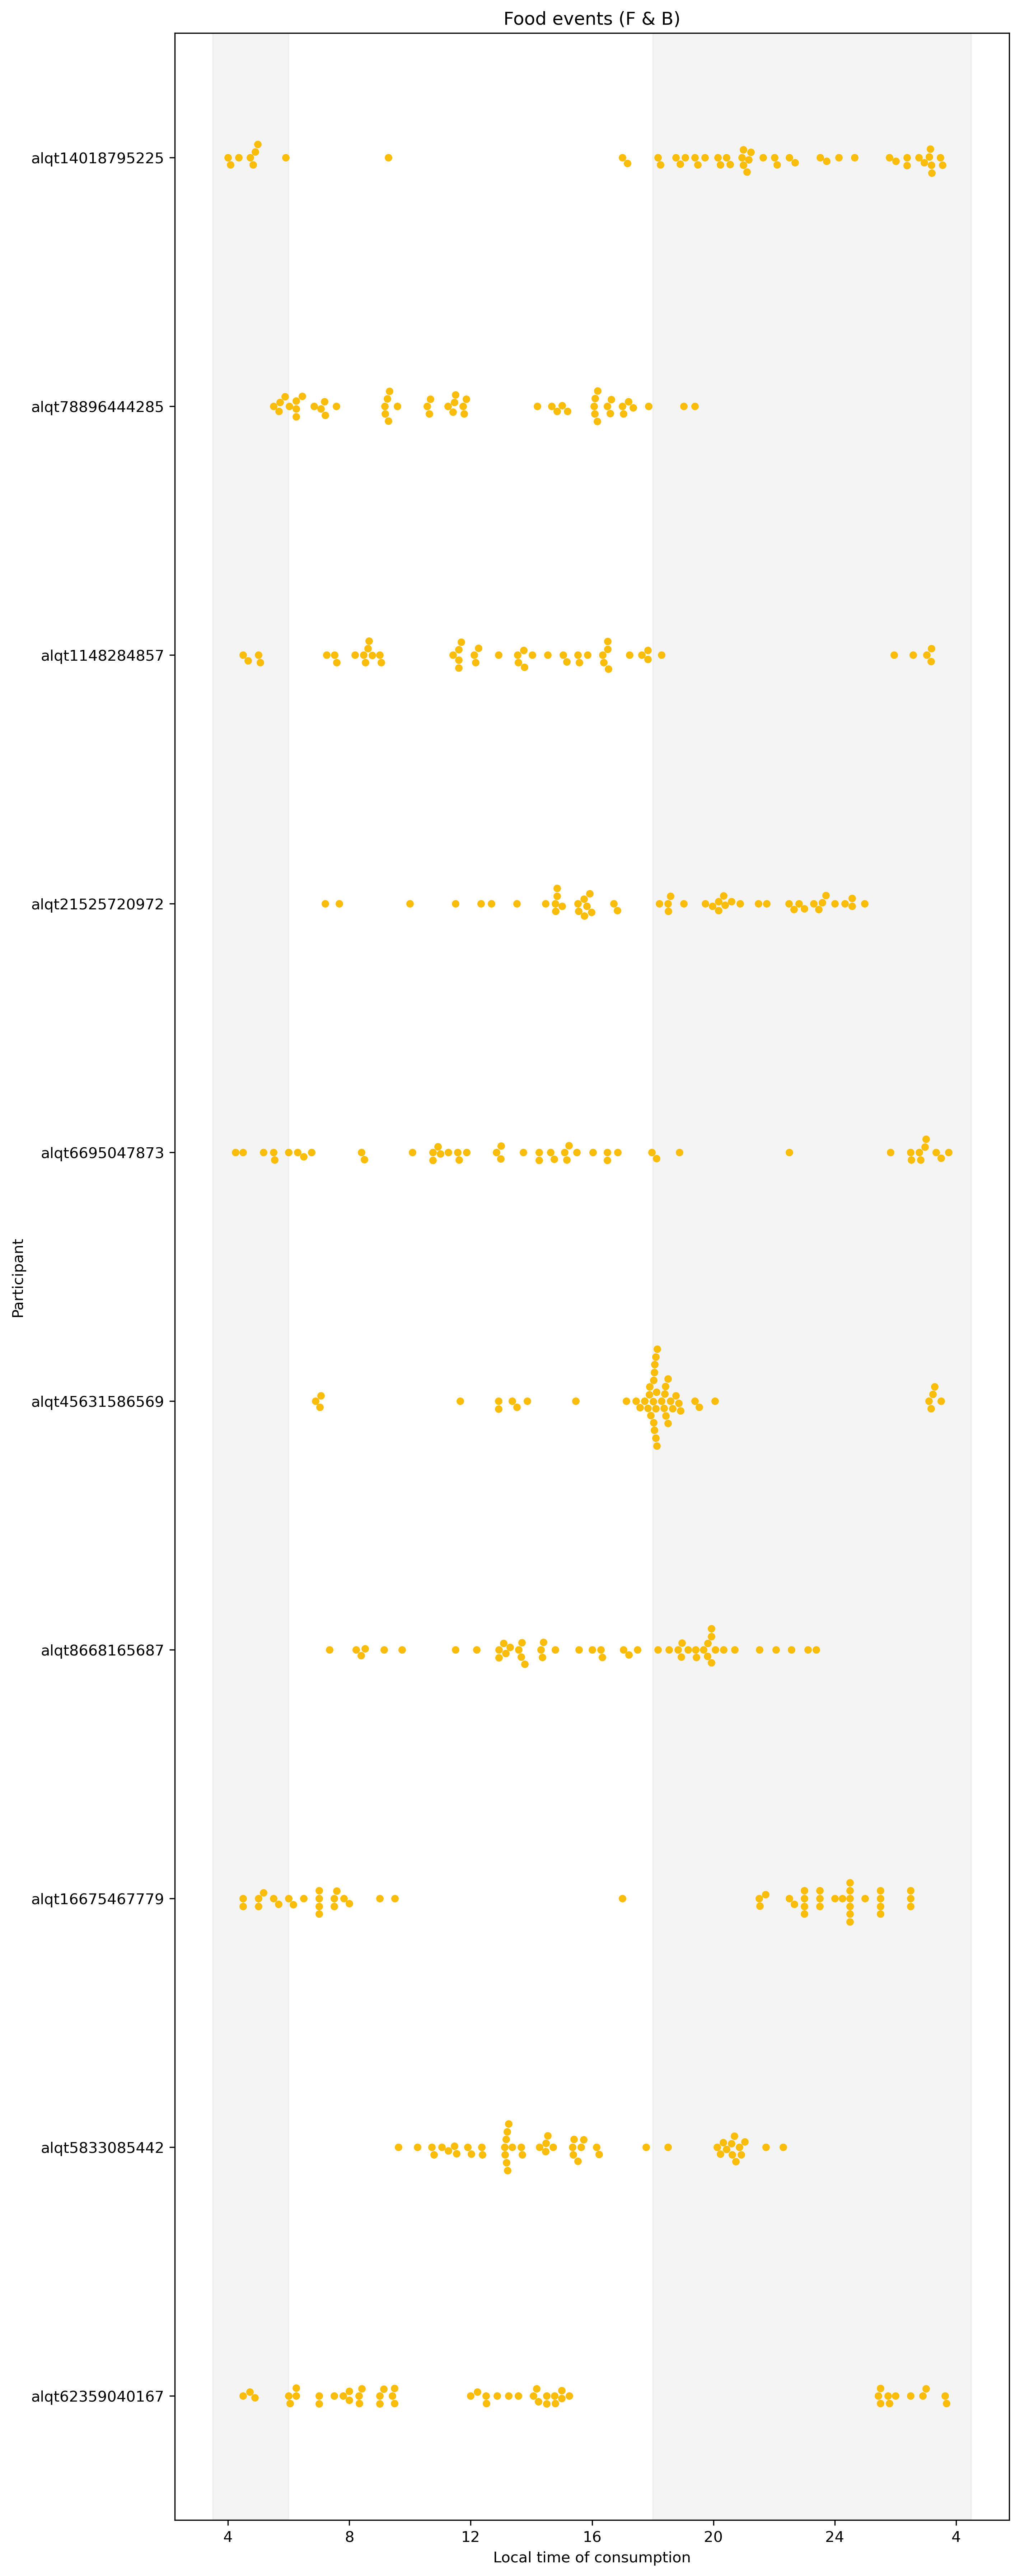

In [ ]:
treets.swarmplot(df, 50, 'unique_code', 'date', 'local_time')